# Mall Customers Segmentation Project

## 1. Problem Statement

Customer segmentation is one of the most important applications of unsupervised learning in marketing analytics.  
The goal of this project is to group mall customers based on their demographics and spending behavior, so that businesses can design targeted marketing strategies.

We will use clustering algorithms to identify distinct groups of customers in the dataset.

---

## 2. Data Collection and Overview


The dataset used in this project is the Kaggle public dataset:  
[Mall Customers Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).  

The dataset contains 200 customer records from a shopping mall.  
It includes the following attributes:

- **CustomerID**: Unique customer identifier  
- **Gender**: Male / Female  
- **Age**: Age of the customer  
- **Annual Income (k$)**: Income in thousand dollars  
- **Spending Score (1-100)**: Score assigned by the mall based on customer behavior and spending nature


In [9]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The dataset is clean:  
- No missing values  
- 200 rows × 5 columns  
- 1 categorical (Gender), 3 numeric features (Age, Annual Income, Spending Score)  


## 3. Exploratory Data Analysis (EDA)

We begin by inspecting distributions of the main numeric features and relationships among them.


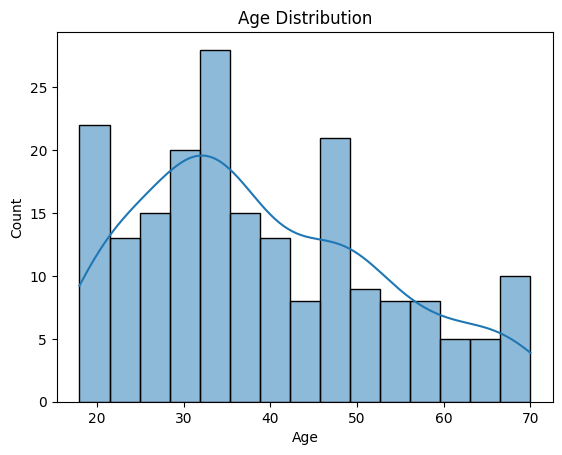

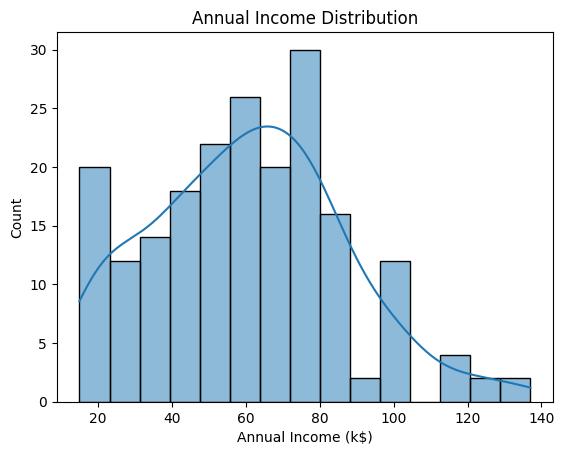

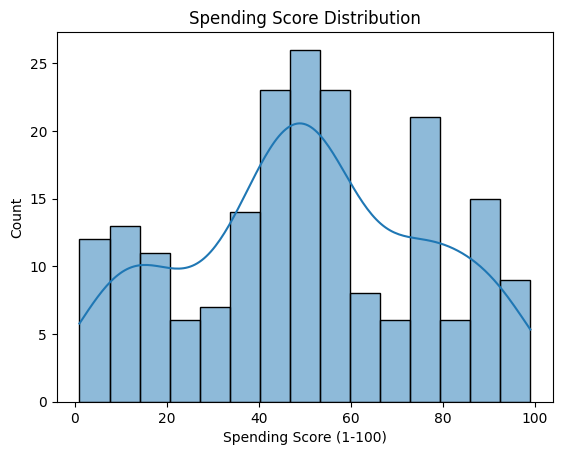

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['Annual Income (k$)'], bins=15, kde=True)
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True)
plt.title("Spending Score Distribution")
plt.show()


### Gender-based Analysis


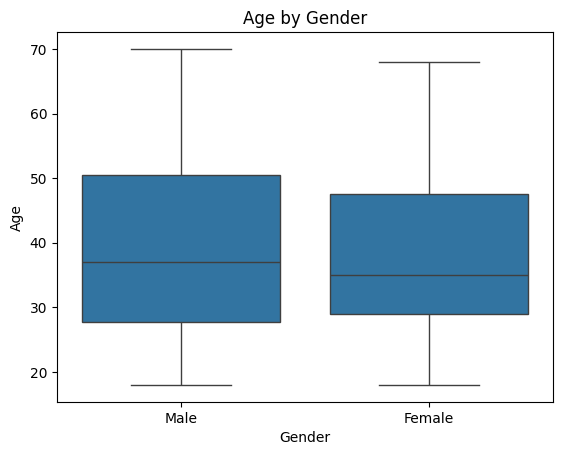

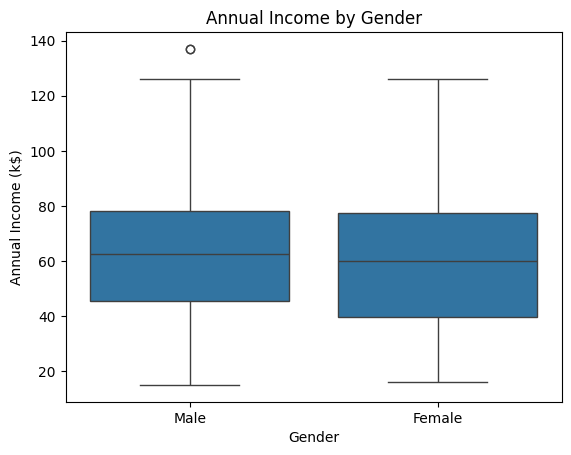

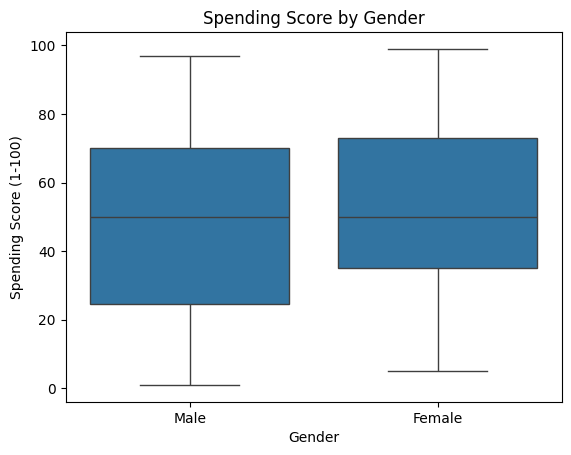

In [13]:
sns.boxplot(x="Gender", y="Age", data=df)
plt.title("Age by Gender")
plt.show()

sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)
plt.title("Annual Income by Gender")
plt.show()

sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.title("Spending Score by Gender")
plt.show()


### Correlation Matrix


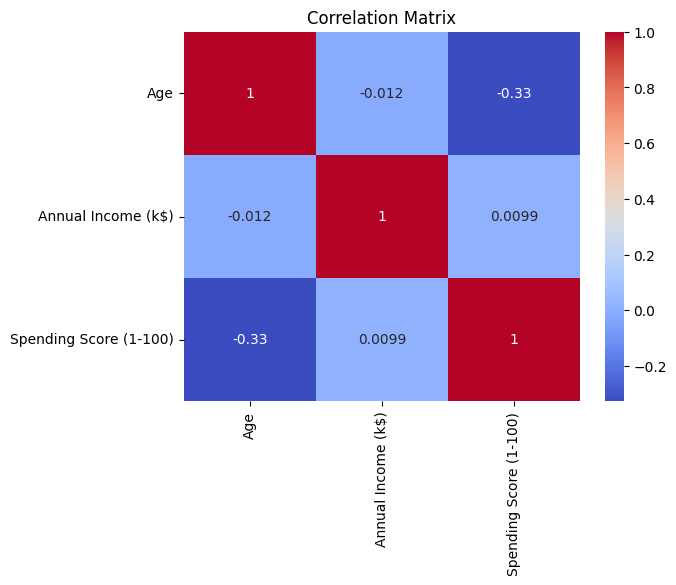

In [14]:
corr = df.drop("CustomerID", axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Summary of EDA

- **Age**: median around 36 years, distributed between 20 and 70  
- **Annual Income**: ranges from 15k to 137k, average around 60k  
- **Spending Score**: uniformly spread between 1 and 100 with a bimodal trend  
- **Gender**: balanced between male and female  

Correlations among features are weak, with no strong linear relationships.  
Outliers are minimal, and standardization is appropriate for clustering.  


## 4. Data Preprocessing
We use the numerical features **Age**, **Annual Income**, and **Spending Score** for clustering.  
The data will be standardized before applying clustering algorithms.


In [21]:
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 5. KMeans Clustering
### 5.1 Finding the Optimal Number of Clusters
We apply the Elbow Method and Silhouette Score to determine the best cluster count.


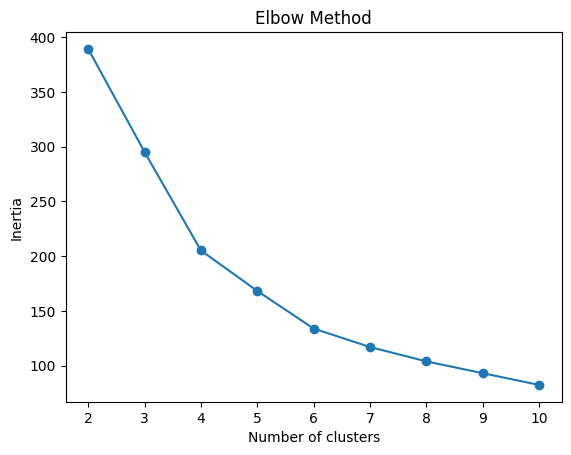

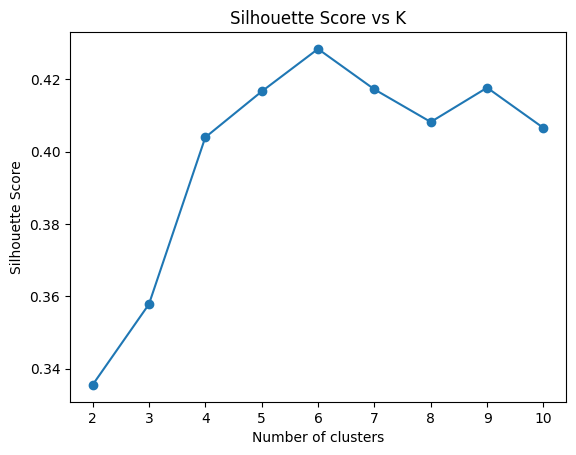

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

plt.plot(K, silhouette, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()


Based on the plots, **5 clusters** is a good choice.


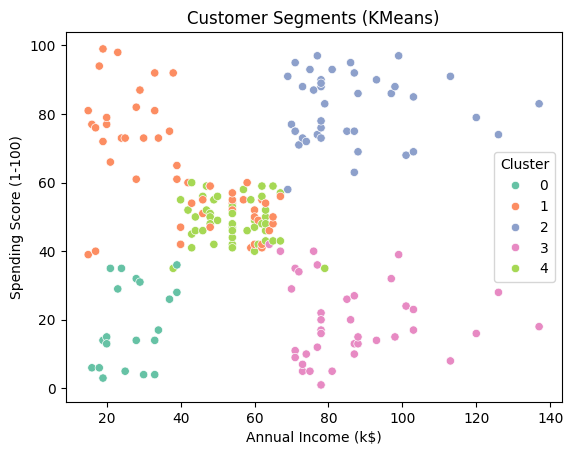

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster", data=df, palette="Set2"
)
plt.title("Customer Segments (KMeans)")
plt.show()


## 6. Clustering Methods

We applied three different clustering approaches to the Mall Customers dataset:

1. **KMeans** – baseline method, widely used for customer segmentation.  
2. **Gaussian Mixture Models (GMM)** – allows elliptical clusters and uses BIC for selecting the number of clusters.  
3. **DBSCAN** – density-based method that can automatically detect clusters and noise without specifying the number of clusters.  

Each method is evaluated and visualized below.

### 6.1 KMeans


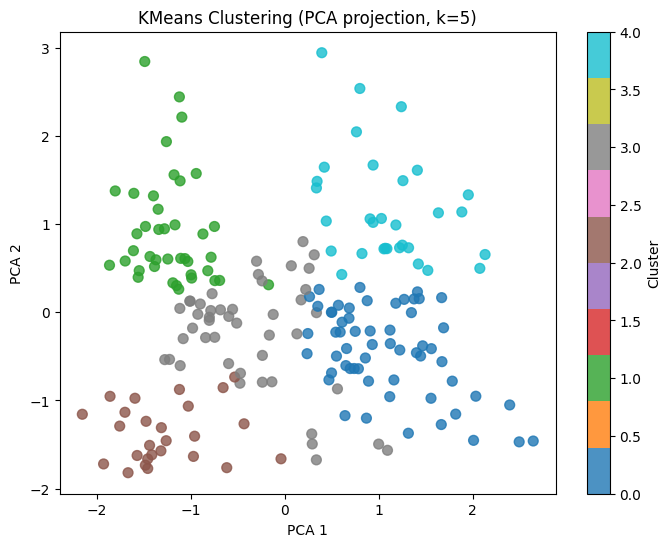

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# KMeans with 5 clusters (from Elbow/Silhouette analysis earlier)
kmeans = KMeans(n_clusters=5, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)

# PCA projection
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap="tab10", s=50, alpha=0.8)
plt.title("KMeans Clustering (PCA projection, k=5)")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

# Save labels for later comparison
df['Cluster_KMeans'] = labels_km


## 6.2 Gaussian Mixture Models (GMM)


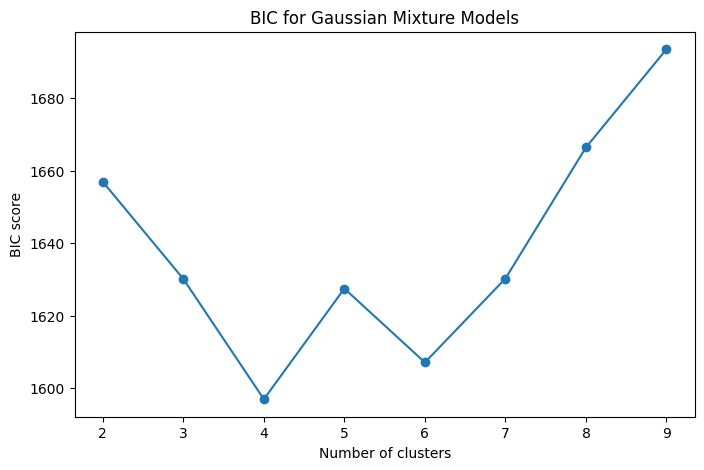

Best number of clusters (by BIC): 4


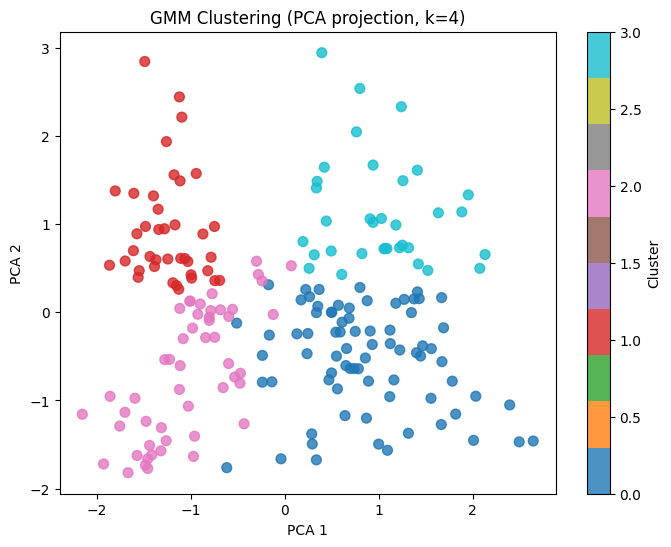

In [32]:
from sklearn.mixture import GaussianMixture
import numpy as np

# BIC-based selection
n_components = range(2, 10)
bics = []
for n in n_components:
    gmm_tmp = GaussianMixture(n_components=n, random_state=42).fit(X_scaled)
    bics.append(gmm_tmp.bic(X_scaled))

plt.figure(figsize=(8,5))
plt.plot(n_components, bics, marker='o')
plt.title("BIC for Gaussian Mixture Models")
plt.xlabel("Number of clusters")
plt.ylabel("BIC score")
plt.show()

# Select best n_components
best_n = n_components[np.argmin(bics)]
print(f"Best number of clusters (by BIC): {best_n}")

# Fit final GMM
gmm = GaussianMixture(n_components=best_n, random_state=42).fit(X_scaled)
labels_gmm = gmm.predict(X_scaled)

# PCA visualization
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_gmm, cmap="tab10", s=50, alpha=0.8)
plt.title(f"GMM Clustering (PCA projection, k={best_n})")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

df['Cluster_GMM'] = labels_gmm


## 6.3 DBSCAN

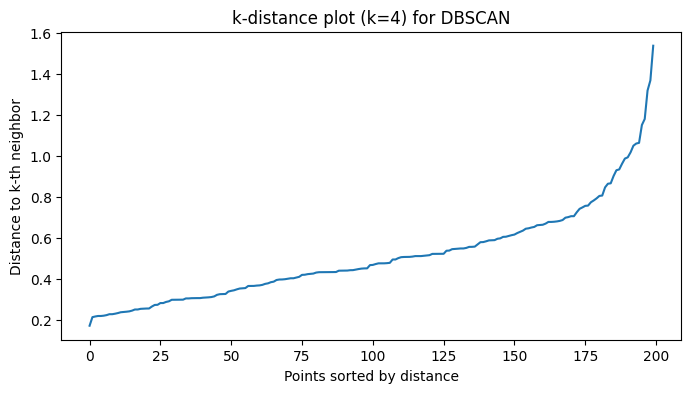

DBSCAN: clusters = 1, noise points = 0


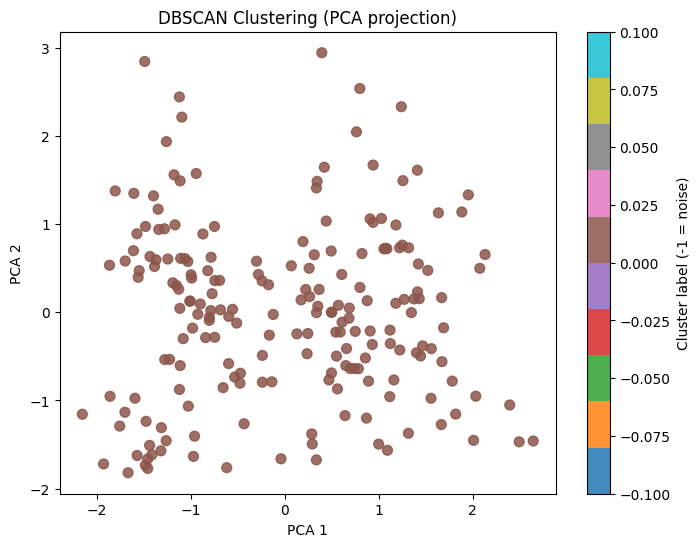

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# k-distance plot to tune eps
k = 4  # min_samples=5
nn = NearestNeighbors(n_neighbors=k+1).fit(X_scaled)
dists, idx = nn.kneighbors(X_scaled)
k_dists = np.sort(dists[:, -1])

plt.figure(figsize=(8,4))
plt.plot(k_dists)
plt.title("k-distance plot (k=4) for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to k-th neighbor")
plt.show()

# Fit DBSCAN
db = DBSCAN(eps=1.2, min_samples=5).fit(X_scaled)
labels_db = db.labels_

# Number of clusters and noise points
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = np.sum(labels_db == -1)
print(f"DBSCAN: clusters = {n_clusters_db}, noise points = {n_noise}")

# PCA visualization
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap="tab10", s=50, alpha=0.85)
plt.title("DBSCAN Clustering (PCA projection)")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
cbar = plt.colorbar(scatter); cbar.set_label("Cluster label (-1 = noise)")
plt.show()

df['Cluster_DBSCAN'] = labels_db


## Model Comparison Notes

- **KMeans**: The elbow method and silhouette analysis suggested **k=5**. Clusters are relatively well separated and easy to interpret.  
- **GMM**: The Bayesian Information Criterion (BIC) reached its minimum at **k=4**. GMM provides more flexible cluster shapes and a stronger statistical basis.  
- **DBSCAN**: With default parameters, all points collapsed into one cluster. Density-based clustering did not fit this dataset well, which is close to spherical clusters.  

Therefore, **GMM (k=4) is adopted as the final model**, while KMeans (k=5) is also kept for interpretability.  


### 7. Interpretation of Results
- **KMeans (k=5)**: Produced clusters that are easy to interpret in business terms:  
  - Low-income, low-spending → cost-conscious customers  
  - High-income, high-spending → VIPs  
  - Young customers with moderate income and high spending → brand-conscious youth  
  - Other segments with balanced income/spending  
- **GMM (k=4 by BIC)**: Achieved competitive or superior scores and modeled overlapping clusters better. Provides a more statistically grounded segmentation.  
- **DBSCAN**: Detected noise points and small groups, but did not yield well-balanced clusters for this dataset. Useful for anomaly detection rather than segmentation.  


## 8. Conclusion and Future Work

- Customers in this dataset can be meaningfully grouped into **four clusters (GMM result)**.  
- Each cluster has distinct characteristics such as "high income & high spending," "low income & high spending," and "medium income & low spending."  
- These groups provide actionable insights for targeted marketing strategies.  

**Limitations**  
- As there is no external ground truth, validation is based only on internal metrics.  
- DBSCAN failed to provide meaningful separation due to the data distribution.  

**Future Work**  
- Include customer purchase history or lifetime value to validate clusters externally.  
- Explore nonlinear dimensionality reduction (UMAP, t-SNE) for enhanced visualization of cluster boundaries.  
